In [42]:
## import
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering, DBSCAN, Birch, AffinityPropagation, MeanShift, OPTICS
from sklearn.mixture import GaussianMixture



## carregar o ficheiro de jogos para um dataframe do pandas
data = pd.read_csv('../files/t1_win_NullCorretion.csv')



data.head(2)     #Mostra as primeiras n linhas do conjunto de dados
data.tail(5)     #Mostra as últimas n linhas do conjunto de dados


,t1_all_total5_fl_match_win,t1_all_total5_fl_match_draw,t1_all_total5_fl_match_lost,t1_all_total10_fl_match_win,t1_all_total10_fl_match_draw,t1_all_total10_fl_match_lost,t2_all_total5_fl_match_win,t2_all_total5_fl_match_draw,t2_all_total5_fl_match_lost,t2_all_total10_fl_match_win,...,t2_away_total10_fl_match_win,t2_away_total10_fl_match_draw,t2_away_total10_fl_match_lost,t1_h2h_total5_fl_match_win,t1_h2h_total5_fl_match_draw,t1_h2h_total5_fl_match_lost,t1_h2h_total10_fl_match_win,t1_h2h_total10_fl_match_draw,t1_h2h_total10_fl_match_lost,t1_fl_match_win
44085,0,2,3,1,5,4,3,1,1,6,...,6,1,2,1,0,4,2,0,8,0
44086,2,1,2,5,2,3,1,1,3,2,...,1,3,4,3,0,2,5,1,4,0
44087,1,2,2,3,3,4,2,1,2,4,...,1,3,2,0,0,0,0,0,0,0
44088,1,2,2,2,3,5,2,3,0,2,...,3,3,1,0,1,1,0,1,1,0
44089,1,1,3,2,1,7,2,0,3,5,...,4,1,4,0,0,1,0,0,1,0


In [43]:
data.shape

(44090, 31)

In [44]:
x = data.iloc[:,1:50] # 1t for rows and second for columns
x


,t1_all_total5_fl_match_draw,t1_all_total5_fl_match_lost,t1_all_total10_fl_match_win,t1_all_total10_fl_match_draw,t1_all_total10_fl_match_lost,t2_all_total5_fl_match_win,t2_all_total5_fl_match_draw,t2_all_total5_fl_match_lost,t2_all_total10_fl_match_win,t2_all_total10_fl_match_draw,...,t2_away_total10_fl_match_win,t2_away_total10_fl_match_draw,t2_away_total10_fl_match_lost,t1_h2h_total5_fl_match_win,t1_h2h_total5_fl_match_draw,t1_h2h_total5_fl_match_lost,t1_h2h_total10_fl_match_win,t1_h2h_total10_fl_match_draw,t1_h2h_total10_fl_match_lost,t1_fl_match_win
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44085,2,3,1,5,4,3,1,1,6,2,...,6,1,2,1,0,4,2,0,8,0
44086,1,2,5,2,3,1,1,3,2,3,...,1,3,4,3,0,2,5,1,4,0
44087,2,2,3,3,4,2,1,2,4,3,...,1,3,2,0,0,0,0,0,0,0
44088,2,2,2,3,5,2,3,0,2,5,...,3,3,1,0,1,1,0,1,1,0


<AxesSubplot:ylabel='t1_h2h_total5_fl_match_lost'>

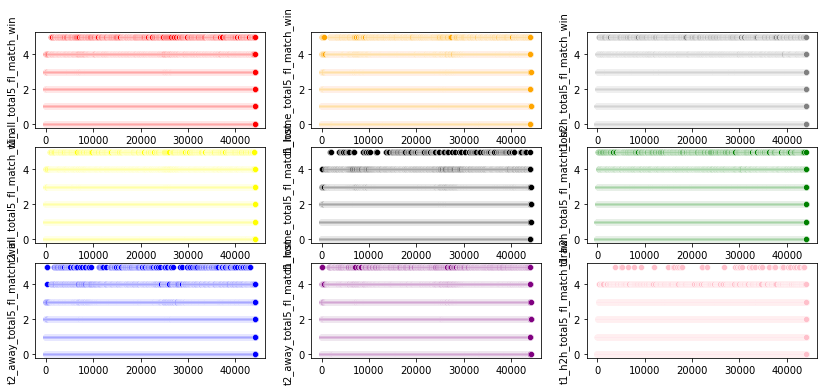

In [45]:
fig, ax= plt.subplots(nrows= 3, ncols = 3, figsize= (14,6))

sns.scatterplot(x=data.index, y='t1_all_total5_fl_match_win', data=data, ax=ax[0][0], color='red')
sns.scatterplot(x=data.index, y='t2_all_total5_fl_match_win', data=data, ax=ax[1][0], color= 'yellow')
sns.scatterplot(x=data.index, y='t1_home_total5_fl_match_win', data=data, ax=ax[0][1], color= 'orange')
sns.scatterplot(x=data.index, y='t1_home_total5_fl_match_lost', data=data, ax=ax[1][1], color= 'black')
sns.scatterplot(x=data.index, y='t2_away_total5_fl_match_win', data=data, ax=ax[2][0], color= 'blue')
sns.scatterplot(x=data.index, y='t2_away_total5_fl_match_lost', data=data, ax=ax[2][1], color= 'purple')
sns.scatterplot(x=data.index, y='t1_h2h_total5_fl_match_win', data=data, ax=ax[0][2], color= 'grey')
sns.scatterplot(x=data.index, y='t1_h2h_total5_fl_match_draw', data=data, ax=ax[2][2], color= 'pink')
sns.scatterplot(x=data.index, y='t1_h2h_total5_fl_match_lost', data=data, ax=ax[1][2], color= 'green')


Text(0, 0.5, 'WCSS')

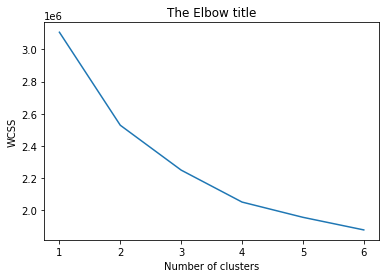

In [46]:
wcss=[]
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [47]:
kmeans = KMeans(3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [48]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([2, 2, 2, ..., 1, 0, 1], dtype=int32)

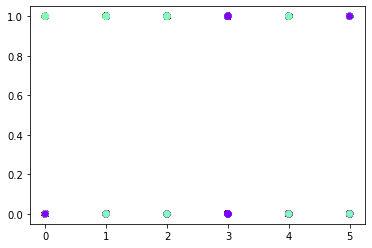

In [49]:
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['t1_all_total5_fl_match_win'],data_with_clusters['t1_fl_match_win'],c=data_with_clusters['Clusters'],cmap='rainbow')


In [50]:
x = data.drop('t1_fl_match_win', axis=1)
y = data.t1_fl_match_win

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.4)

ss = StandardScaler()
X_scaled = pd.DataFrame(ss.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(ss.transform(X_test), columns=X_test.columns)

oversample = SMOTE()
X_balanced, y_balanced = oversample.fit_resample(X_scaled, y_train)
X_test_balanced, y_test_balanced = oversample.fit_resample(X_test_scaled, y_test)

pca = PCA(n_components=2)
components = pca.fit_transform(X_balanced)
df = pd.DataFrame(data = components, columns = ['t1_all_total5_fl_match_win', 't1_fl_match_win']).values

In [52]:
df = pd.DataFrame(df)

fdf = pd.concat([df, y_balanced], axis = 1).values

fdf

array([[-1.19614396, -1.35465357,  0.        ],
       [ 1.1335821 , -2.75003179,  0.        ],
       [-2.01571187,  0.67113921,  1.        ],
       ...,
       [-1.85134848, -3.74608962,  1.        ],
       [ 6.11418422, -0.24227585,  1.        ],
       [-1.59015621,  1.26834762,  1.        ]])

In [53]:
#show graph
def showgraph():
    plt.scatter(fdf[y_kmeans == 0, 0], fdf[y_kmeans == 0, 1], s = 0.5, c = 'red', label = 'Cluster 1')
    plt.scatter(fdf[y_kmeans == 1, 0], fdf[y_kmeans == 1, 1], s = 0.5, c = 'blue', label = 'Cluster 2')
    plt.scatter(fdf[y_kmeans == 2, 0], fdf[y_kmeans == 2, 1], s = 0.5, c = 'green', label = 'Cluster 3')
    plt.scatter(fdf[y_kmeans == 3, 0], fdf[y_kmeans == 3, 1], s = 5, c = 'cyan', label = 'Cluster 4')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 10, c = 'yellow', label = 'Centroids')
    plt.title('Clustering')
    plt.legend()

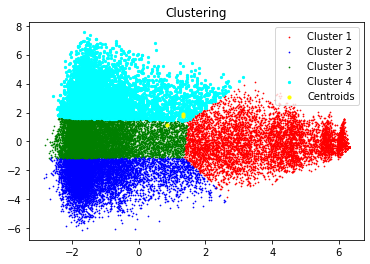

In [54]:
#K-means clustering algorithm
clusteringmodel = KMeans(n_clusters= 4)
y_kmeans= clusteringmodel.fit_predict(fdf)
showgraph()

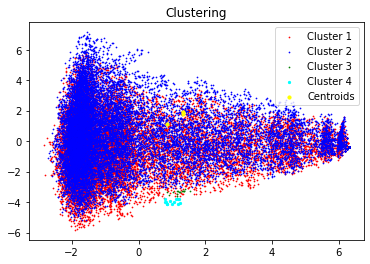

In [56]:
#DBSCAN clustering algorithm
clusteringmodel = DBSCAN(eps=0.25, min_samples=9)
y_kmeans= clusteringmodel.fit_predict(fdf)
showgraph()

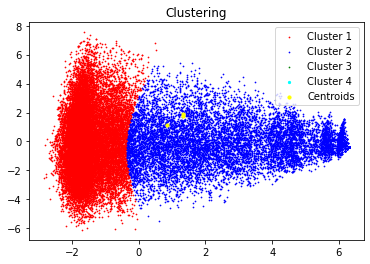

In [57]:
#Gaussian Mixture clustering algorithm
clusteringmodel = GaussianMixture(n_components=2)
y_kmeans= clusteringmodel.fit_predict(fdf)
showgraph()

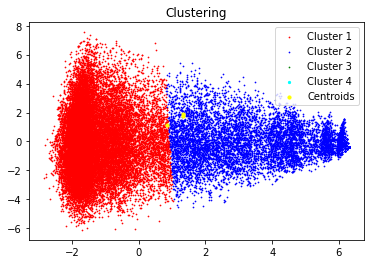

In [58]:
#Mean-Shift  algorithm
clusteringmodel = MeanShift()
y_kmeans= clusteringmodel.fit_predict(fdf)
showgraph()

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_optics.py:903: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


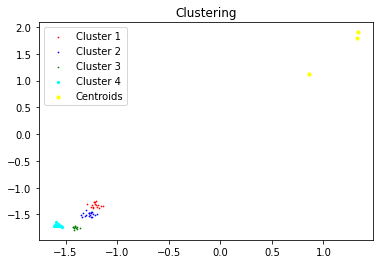

In [59]:
#OPTICS algorithm
clusteringmodel = OPTICS(eps=0.75, min_samples=10)
y_kmeans= clusteringmodel.fit_predict(fdf)
showgraph()

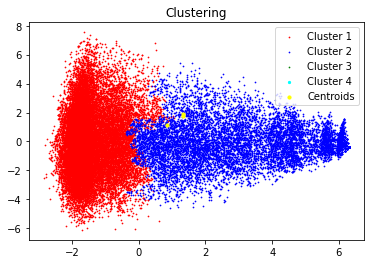

In [60]:
#Agglomerative Hierarchy
clusteringmodel = AgglomerativeClustering(n_clusters=2)
y_kmeans= clusteringmodel.fit_predict(fdf)
showgraph()

#more than 16gb ram to run
#BIRCH clustering algorithm
clusteringmodel = Birch(threshold=0.03, n_clusters=2)
y_kmeans= clusteringmodel.fit_predict(finalDf)
showgraph()

#more than 16gb ram to run
#Affinity Propagation algorithm
clusteringmodel = AffinityPropagation(damping=0.7)
y_kmeans= clusteringmodel.fit_predict(finalDf)
showgraph()